<a href="https://colab.research.google.com/github/dhrumil231/-FlipkartReviewsSentimentAnalysis-using-Python/blob/main/Flipkart_Reviews_Sentiment_Analysis_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Step 1 - Importing the Libraries and Dataset**

In [2]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

file_path = '/content/flipkart_data.csv'
df = pd.read_csv(file_path)


df.head()

,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,awesome bass sound quality very good bettary l...,5


# **Step 2 - Preprocessing the Data**

In [3]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_reviews_stopwords(df):
    df['review'] = df['review'].str.lower()
    df['review'] = df['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
    df['sentiment'] = df['rating'].apply(lambda x: 1 if x >= 4 else 0)
    return df

df_cleaned = preprocess_reviews_stopwords(df)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# **Step 3 - Visualizing the data**

**Sentiment Distribution and Word Cloud for Positive and Negative Review Sentiments**

---



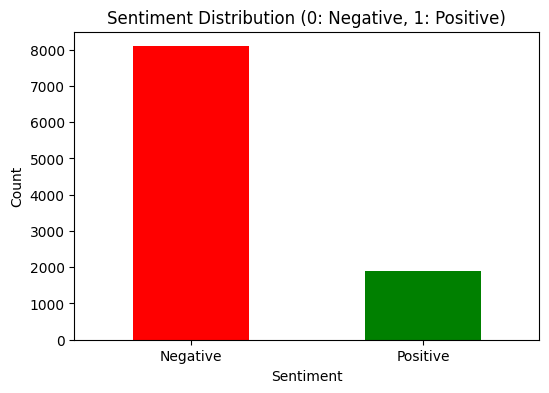

In [4]:
sentiment_counts = df_cleaned['sentiment'].value_counts()
plt.figure(figsize=(6, 4))
sentiment_counts.plot(kind='bar', color=['red', 'green'])
plt.title('Sentiment Distribution (0: Negative, 1: Positive)')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Negative', 'Positive'], rotation=0)
plt.show()

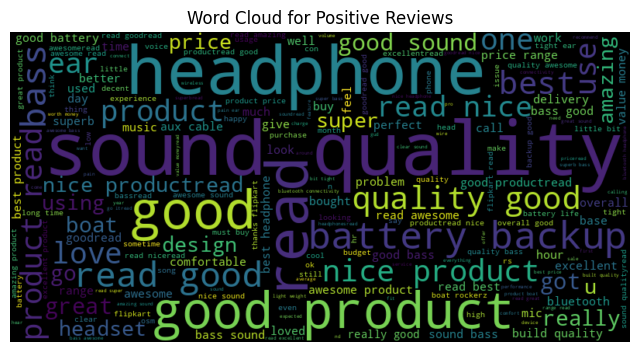

In [5]:
positive_reviews = df_cleaned[df_cleaned['sentiment'] == 1]['review']
positive_text = ' '.join(positive_reviews)
wordcloud = WordCloud(width=800, height=400).generate(positive_text)

plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()

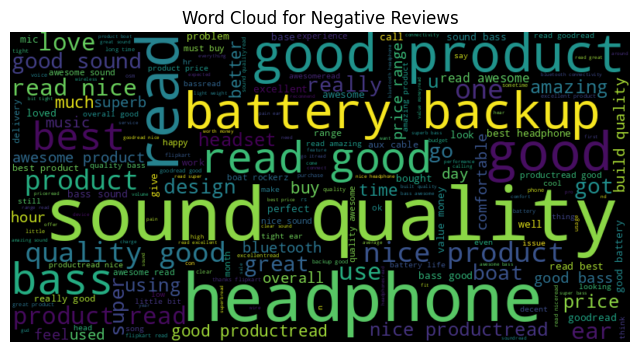

In [6]:
negative_reviews = df_cleaned[df_cleaned['sentiment'] == 1]['review']
negative_text = ' '.join(negative_reviews)
wordcloud = WordCloud(width=800, height=400).generate(negative_text)

plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews')
plt.show()

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer #TF-IDF (Term Frequency-Inverse Document Frequency)

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df_cleaned['review'])
y = df_cleaned['sentiment']

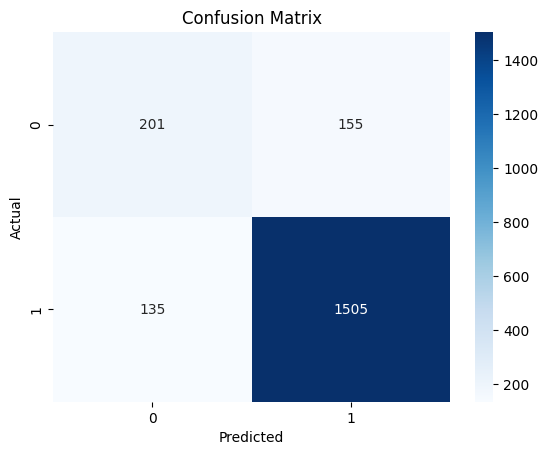

0.8547094188376754


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix , annot=True,fmt='d', cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print(accuracy)

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

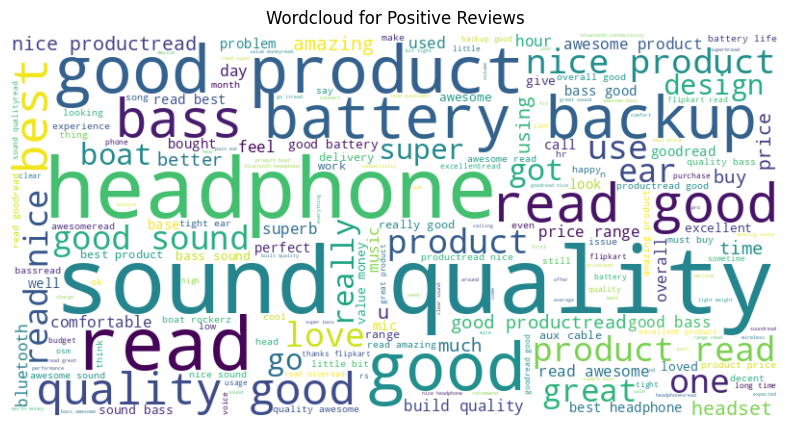

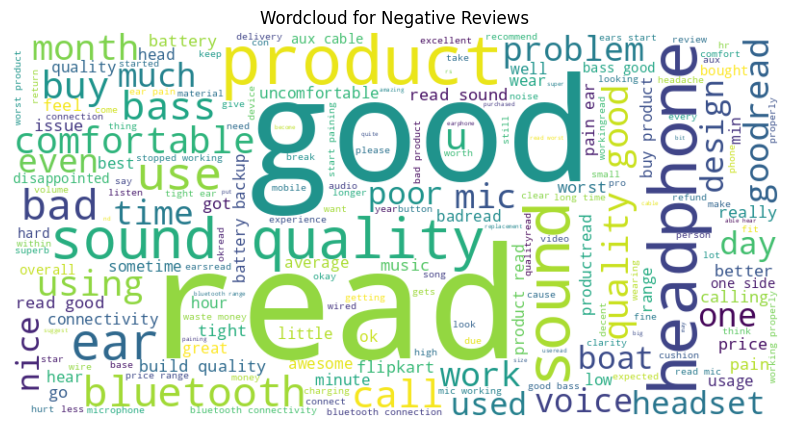

In [10]:
# WordCloud for Positive and Negative reviews
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Assuming df has 'review_text' and 'sentiment' columns, sentiment is 'positive'/'negative'
positive_reviews = df_cleaned[df_cleaned['sentiment']==1]['review'] # Changed column and sentiment value
negative_reviews = df_cleaned[df_cleaned['sentiment']==0]['review'] # Changed column and sentiment value

plot_wordcloud(positive_reviews, 'Wordcloud for Positive Reviews')
plot_wordcloud(negative_reviews, 'Wordcloud for Negative Reviews')

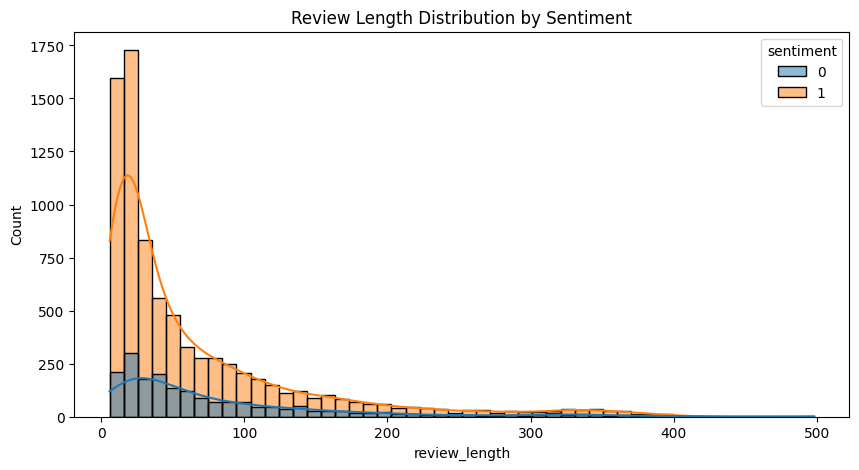

In [11]:
# Distribution of Review Lengths
df_cleaned['review_length'] = df_cleaned['review'].apply(len)
plt.figure(figsize=(10,5))
sns.histplot(data=df_cleaned, x='review_length', hue='sentiment', bins=50, kde=True)
plt.title('Review Length Distribution by Sentiment')
plt.show()

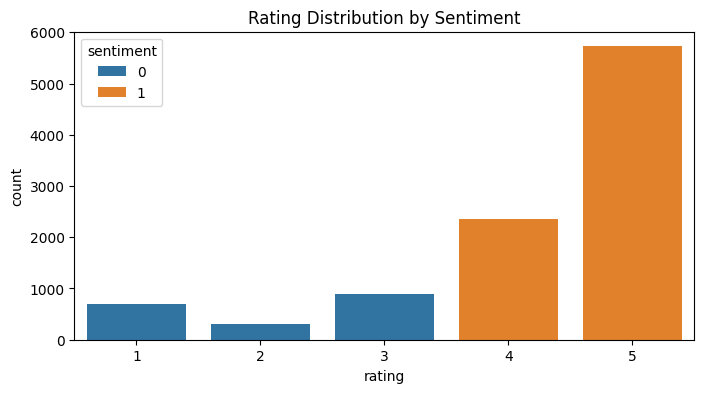

In [12]:
# Rating Distribution (if rating column exists)
if 'rating' in df.columns:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x='rating', hue='sentiment')
    plt.title('Rating Distribution by Sentiment')
    plt.show()

In [13]:
# Top 10 frequent words per sentiment class
from collections import Counter
import re

def get_top_n_words(text_series, n=10):
    words = ' '.join(text_series).lower()
    words = re.findall(r'\b\w+\b', words)
    common_words = Counter(words).most_common(n)
    return common_words

top_pos = get_top_n_words(positive_reviews)
top_neg = get_top_n_words(negative_reviews)

print("Top 10 Positive Words:", top_pos)
print("Top 10 Negative Words:", top_neg)

Top 10 Positive Words: [('good', 3865), ('read', 2996), ('product', 2531), ('sound', 2312), ('quality', 2140), ('bass', 1629), ('nice', 1391), ('best', 1122), ('awesome', 1054), ('battery', 887)]
Top 10 Negative Words: [('good', 751), ('read', 745), ('sound', 532), ('quality', 494), ('product', 442), ('bluetooth', 245), ('bass', 214), ('ears', 200), ('ear', 194), ('buy', 194)]


In [14]:
# Use the cleaned dataFrame and the 'review' and 'sentiment' columns that exist
X = df_cleaned['review']
y = df_cleaned['sentiment']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize text
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


Training and evaluating: Logistic Regression
              precision    recall  f1-score   support

           0       0.84      0.47      0.60       356
           1       0.90      0.98      0.94      1640

    accuracy                           0.89      1996
   macro avg       0.87      0.73      0.77      1996
weighted avg       0.89      0.89      0.88      1996



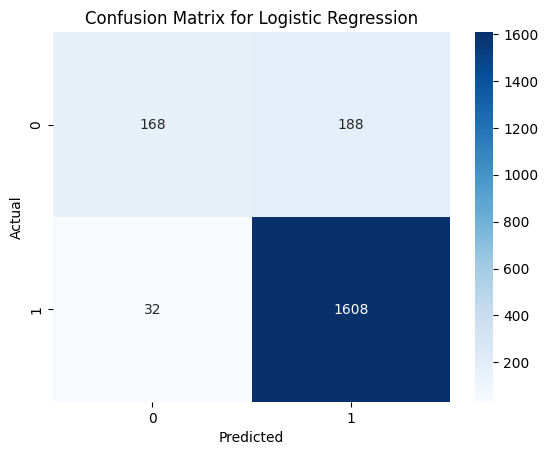

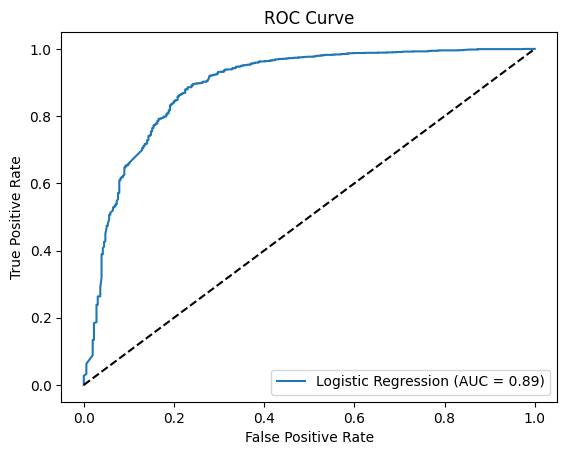


Training and evaluating: Random Forest
              precision    recall  f1-score   support

           0       0.82      0.56      0.67       356
           1       0.91      0.97      0.94      1640

    accuracy                           0.90      1996
   macro avg       0.87      0.77      0.81      1996
weighted avg       0.90      0.90      0.89      1996



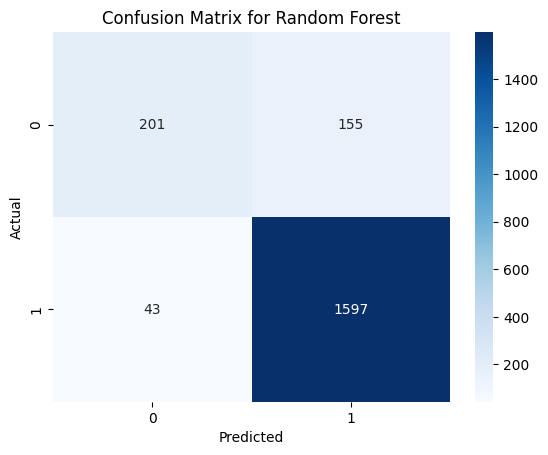

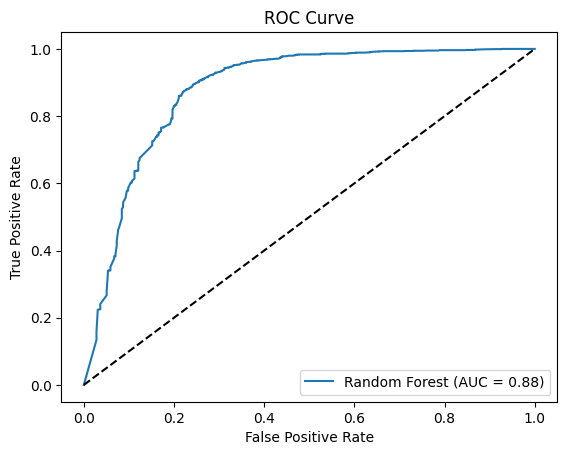


Training and evaluating: Gradient Boosting
              precision    recall  f1-score   support

           0       0.83      0.31      0.45       356
           1       0.87      0.99      0.92      1640

    accuracy                           0.87      1996
   macro avg       0.85      0.65      0.69      1996
weighted avg       0.86      0.87      0.84      1996



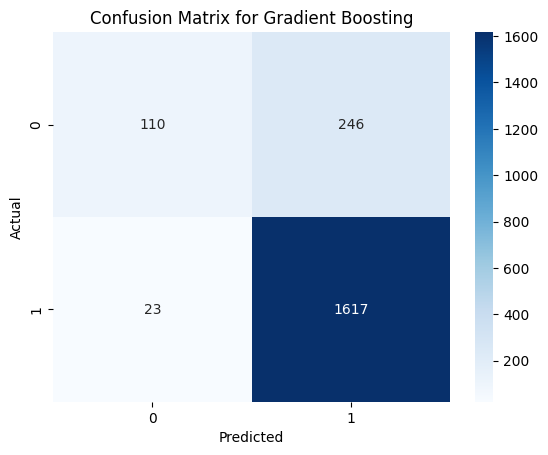

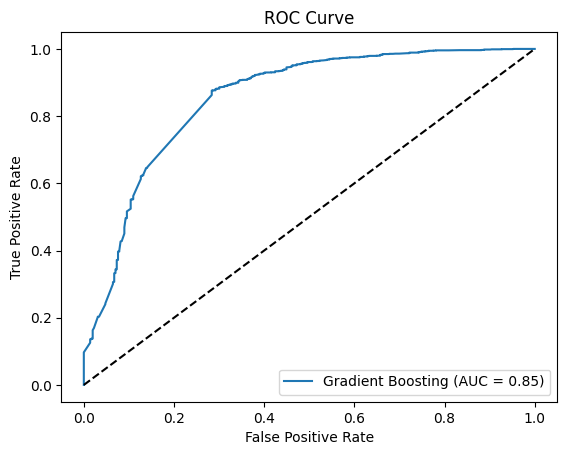


Training and evaluating: SVM
              precision    recall  f1-score   support

           0       0.86      0.54      0.67       356
           1       0.91      0.98      0.94      1640

    accuracy                           0.90      1996
   macro avg       0.88      0.76      0.80      1996
weighted avg       0.90      0.90      0.89      1996



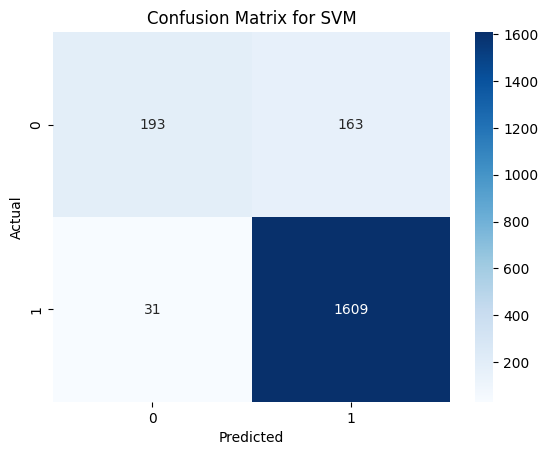

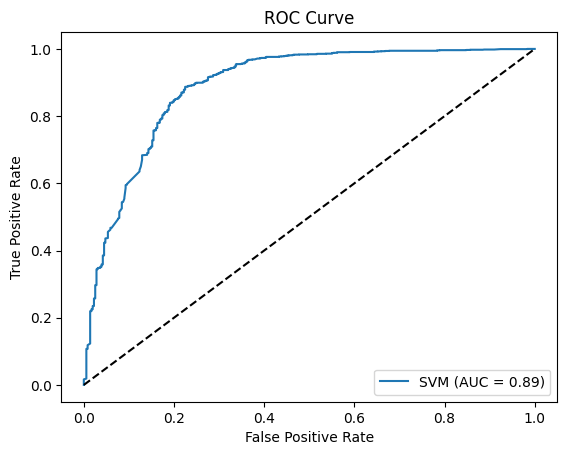


Training and evaluating: MLP Neural Network
              precision    recall  f1-score   support

           0       0.64      0.62      0.63       356
           1       0.92      0.92      0.92      1640

    accuracy                           0.87      1996
   macro avg       0.78      0.77      0.78      1996
weighted avg       0.87      0.87      0.87      1996



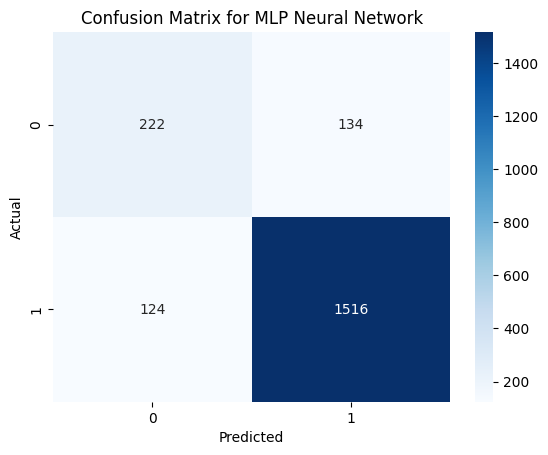

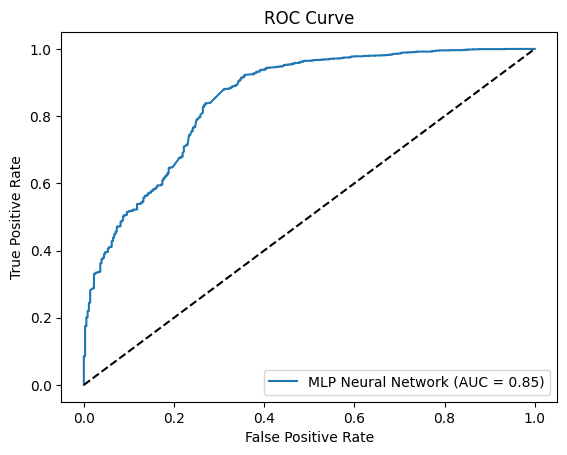

In [15]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(probability=True),
    'MLP Neural Network': MLPClassifier(max_iter=300)
    # Random Forest Classifier
    #Gradient Boosting (e.g., XGBoost or LightGBM)
    #Support Vector Machine (SVM)
    #Neural Network (MLPClassifier)
}
for name, model in models.items():
    print(f"\nTraining and evaluating: {name}")
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)
    y_proba = model.predict_proba(X_test_vec)[:,1]

    print(classification_report(y_test, y_pred))
#Confusion matrix visualization for model evaluation
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# ROC Curve for classification models
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    auc_score = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

In [16]:
!pip install transformers datasets torch scikit-learn matplotlib seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 82.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 41.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [17]:
#Importing libraries
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertForSequenceClassification, get_scheduler
from torch.optim import AdamW # Import AdamW from torch.optim
from tqdm import tqdm

In [18]:
# Assuming df is your Flipkart reviews dataset with 'review_text' and 'sentiment' columns
df = pd.read_csv('/content/flipkart_data.csv')

# Encode sentiment: 1 for positive, 0 for negative
def preprocess_reviews_stopwords(df):
    df['review'] = df['review'].str.lower()
    # Ensure stop_words is defined - it was defined earlier but scope might be an issue if running cells out of order
    try:
        stop_words
    except NameError:
        import nltk
        from nltk.corpus import stopwords
        nltk.download('stopwords')
        stop_words = set(stopwords.words('english'))
    df['review'] = df['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
    df['sentiment'] = df['rating'].apply(lambda x: 1 if x >= 4 else 0) # Create the 'sentiment' column
    df['label'] = df['sentiment'] # Use the existing 0/1 sentiment column as the label - Moved this line here
    return df

# Apply preprocessing to the newly loaded df
df = preprocess_reviews_stopwords(df)

# Train-test split
from sklearn.model_selection import train_test_split
# Use 'review' column from the preprocessed df for text data
train_texts, test_texts, train_labels, test_labels = train_test_split(df['review'].tolist(), df['label'].tolist(), test_size=0.2, random_state=42)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased') #Tokenize Text with BERT Tokenizer

train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=128)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [20]:
class SentimentDataset(Dataset): #Creating the Pytorch dataset
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = SentimentDataset(train_encodings, train_labels)
test_dataset = SentimentDataset(test_encodings, test_labels)

In [ ]:
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device) #Load Pretrained BERT model

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

optimizer = AdamW(model.parameters(), lr=5e-5)
num_epochs = 3
lr_scheduler = get_scheduler("linear", optimizer=optimizer, num_warmup_steps=0,
                             num_training_steps=num_epochs * len(train_loader)) #Training Setup

In [ ]:
model.train()
for epoch in range(num_epochs):
    print(f"Epoch {epoch+1}")
    loop = tqdm(train_loader)
    for batch in loop:
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        lr_scheduler.step()
        optimizer.zero_grad()
        loop.set_description(f"Epoch {epoch+1}")
        loop.set_postfix(loss=loss.item()) #Training the BERT Model

Epoch 1


Epoch 1: 100%|██████████| 499/499 [2:29:01<00:00, 17.92s/it, loss=0.392]


Epoch 2


Epoch 2: 100%|██████████| 499/499 [2:28:28<00:00, 17.85s/it, loss=0.24]


Epoch 3


Epoch 3:  12%|█▏        | 62/499 [18:06<2:07:13, 17.47s/it, loss=0.272]

In [ ]:
model.eval()
all_preds = []
all_probs = []
all_labels = []

with torch.no_grad():
    for batch in test_loader:
        inputs = {k: v.to(device) for k, v in batch.items() if k != 'labels'}
        outputs = model(**inputs)
        probs = torch.nn.functional.softmax(outputs.logits, dim=-1)
        preds = torch.argmax(probs, dim=1)

        all_preds.extend(preds.cpu().numpy())
        all_probs.extend(probs[:, 1].cpu().numpy())
        all_labels.extend(batch['labels'].numpy())

# Evaluation metrics
print("Classification Report:\n", classification_report(all_labels, all_preds))

NameError: name 'model' is not defined